# **Project 2 - Investing in Stocks: (Fall 2021)**

**‘Can a Member of Congress give you stock tips?’**

TEAM 4 - 

* Aishwary Bodhale
* Himanshu Dubey
* Karishma Ramchandani
* Nandan Adlakha
* Rachel Kallely
* Sahibpreet Singh

## **Introduction**



---

More than half of the Members of Congress are millionaires and are investigated for potentially violating the STOCK act - and that many are trading individual stocks. We will analyze investments done by Senator, Susan M Collins to create investment portfolio for our investor.

We will proceed by first exploring the investments done by Senator and then create models to analyze risk and lastly will create investment portfolio. 

One of the founding fathers of modern portfolio theory is Harry Markowitz, and one of his seminal contributions was the ‘Mean-Variance portfolio optimization model’, which is a nonlinear optimization problem where, given a set of assets and a budget, the goal is to select the amount of money to allocate to each asset such that:

* The expected income of the selected portfolio is equal to some predefined value; 

* The goal is to minimize the risk, which is given by the covariance (risk) of the portfolio.


## **Importing Modules**



---

**NOTE** : Please run import modules and then restart runtime and then proceed. This is required because we have use some commands for which matplotlib version 3.4.3 was required. 

In [ ]:
# some useful modules
!pip install matplotlib --upgrade
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# code for ignoring the Warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Mounting Google drive
from google.colab import drive
drive.mount('/content/drive') # Pasting the authorization key

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Data Preparation**



---


### **Importing the Original Dataset**

In [ ]:
# Reading and storing data in dataframe df
# Saving the link of data in a variable URL
URL = 'https://docs.google.com/spreadsheets/d/1wCnG2pd2w2rYc_vL1X43trJ-ueMAnsG2/edit?usp=sharing&ouid=102586997733335171290&rtpof=true&sd=true'
# To download the content of the link
fixed_path = 'https://drive.google.com/uc?export=download&id='
# Extract the file ID from the URL
file_path = URL.split('/')[-2]
# Retrieve the Excel data and build a dataframe
df = pd.read_excel(fixed_path+file_path)

# Change options to show all rows
pd.set_option("display.max_rows", None, "display.max_columns", None)

# Number of lines and columns
print(df.shape)

# First lines of the dataframe
df.head()

(449, 12)


,transaction_date,owner,ticker,asset_description,asset_type,type,amount,comment,senator,ptr_link,disclosure_date,Industry
0,2021-06-09,Spouse,--,"Maine St 56052AE93 <div class=""text-muted""><em...",Municipal Security,Purchase,"$50,001 - $100,000",--,Susan M Collins,https://efdsearch.senate.gov/search/view/ptr/9...,2021-07-14,NaN
1,2021-04-29,Spouse,--,"ME St Muni Bond Bank 56045RWK1 <div class=""tex...",Municipal Security,Purchase,"$15,001 - $50,000",--,Susan M Collins,https://efdsearch.senate.gov/search/view/ptr/b...,2021-05-12,NaN
2,2021-04-29,Spouse,--,ME St Health &amp; Higher Ed 560427VR4 <div cl...,Municipal Security,Purchase,"$50,001 - $100,000",--,Susan M Collins,https://efdsearch.senate.gov/search/view/ptr/b...,2021-05-12,NaN
3,2021-03-31,Spouse,--,"Fed Farm Credit Bk 3133EMUU4 <div class=""text-...",Corporate Bond,Purchase,"$100,001 - $250,000",--,Susan M Collins,https://efdsearch.senate.gov/search/view/ptr/4...,2021-04-08,NaN
4,2021-03-16,Spouse,--,"ME St Govt Facs Auth 56041MPT5 <div class=""tex...",Municipal Security,Purchase,"$50,001 - $100,000",--,Susan M Collins,https://efdsearch.senate.gov/search/view/ptr/4...,2021-04-08,NaN


In [ ]:
# To check data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 449 entries, 0 to 448
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   transaction_date   449 non-null    datetime64[ns]
 1   owner              394 non-null    object        
 2   ticker             394 non-null    object        
 3   asset_description  449 non-null    object        
 4   asset_type         209 non-null    object        
 5   type               394 non-null    object        
 6   amount             449 non-null    object        
 7   comment            394 non-null    object        
 8   senator            449 non-null    object        
 9   ptr_link           449 non-null    object        
 10  disclosure_date    449 non-null    datetime64[ns]
 11  Industry           117 non-null    object        
dtypes: datetime64[ns](2), object(10)
memory usage: 42.2+ KB


### **Data Preparation**



#### **1. Data Filtering**

The Senator has invested in different types of assets such as Municipal Security , Corporate Bond, Stocks and PDF Disclosed Filing. Some of the investments are not categorized. 
So for our assessment we will filter the data by asset_type as stock as we have to analyse the investmnets done by the senator in stocks. 


In [ ]:
df['asset_type'].unique()

array(['Municipal Security', 'Corporate Bond', 'Stock', nan,
       'PDF Disclosed Filing'], dtype=object)

In [ ]:
#  Filtering all rows that are stocks and storing in new dataframe 
df_stock = df[(df['asset_type'] == 'Stock')]
df_stock.head()

,transaction_date,owner,ticker,asset_description,asset_type,type,amount,comment,senator,ptr_link,disclosure_date,Industry
7,2020-12-16,Spouse,DNKN,"Dunkin' Brands Group, Inc.",Stock,Sale (Full),"$50,001 - $100,000",--,Susan M Collins,https://efdsearch.senate.gov/search/view/ptr/2...,2021-01-12,Fastfood
14,2019-08-15,Spouse,CVET,"Covetrus, Inc.",Stock,Sale (Full),"$1,001 - $15,000",--,Susan M Collins,https://efdsearch.senate.gov/search/view/ptr/6...,2019-09-10,Medical
15,2019-08-20,Spouse,AKAM,"Akamai Technologies, Inc.",Stock,Purchase,"$15,001 - $50,000",--,Susan M Collins,https://efdsearch.senate.gov/search/view/ptr/6...,2019-09-10,Internet Company
16,2019-05-17,Spouse,RHT,"Red Hat, Inc.",Stock,Sale (Full),"$50,001 - $100,000",--,Susan M Collins,https://efdsearch.senate.gov/search/view/ptr/e...,2019-06-11,IT Company
17,2019-05-21,Spouse,WEX,WEX Inc.,Stock,Purchase,"$15,001 - $50,000",--,Susan M Collins,https://efdsearch.senate.gov/search/view/ptr/e...,2019-06-11,IT Company


#### **2. Check Missing Value**

We don't have any missing values in our data now.

In [ ]:
#checking the number of nulls in the dataset
df_stock.isnull().sum()

transaction_date     0
owner                0
ticker               0
asset_description    0
asset_type           0
type                 0
amount               0
comment              0
senator              0
ptr_link             0
disclosure_date      0
Industry             0
dtype: int64

### **Data Manipulation**

#### **1. Removing Columns**

We will now remove the columns that have only one unique value or are not important for analysis. 

In [ ]:
# To drop the columns that have only 1 unique value
df_stock = df_stock.drop(['owner', 'asset_type', 'comment', 'senator', 'ptr_link', 'disclosure_date'], axis=1)
# display the first 5 rows
df_stock.head()

,transaction_date,ticker,asset_description,type,amount,Industry
7,2020-12-16,DNKN,"Dunkin' Brands Group, Inc.",Sale (Full),"$50,001 - $100,000",Fastfood
14,2019-08-15,CVET,"Covetrus, Inc.",Sale (Full),"$1,001 - $15,000",Medical
15,2019-08-20,AKAM,"Akamai Technologies, Inc.",Purchase,"$15,001 - $50,000",Internet Company
16,2019-05-17,RHT,"Red Hat, Inc.",Sale (Full),"$50,001 - $100,000",IT Company
17,2019-05-21,WEX,WEX Inc.,Purchase,"$15,001 - $50,000",IT Company


In [ ]:
df_stock.head()

,transaction_date,ticker,asset_description,type,amount,Industry
7,2020-12-16,DNKN,"Dunkin' Brands Group, Inc.",Sale (Full),"$50,001 - $100,000",Fastfood
14,2019-08-15,CVET,"Covetrus, Inc.",Sale (Full),"$1,001 - $15,000",Medical
15,2019-08-20,AKAM,"Akamai Technologies, Inc.",Purchase,"$15,001 - $50,000",Internet Company
16,2019-05-17,RHT,"Red Hat, Inc.",Sale (Full),"$50,001 - $100,000",IT Company
17,2019-05-21,WEX,WEX Inc.,Purchase,"$15,001 - $50,000",IT Company


#### **2. Data Cleaning**



##### A) Amount
The amount invested is given in range so for analysis we are going to take the higher range. We will separate the lower and upper range in two different columns amount_lower and 

In [ ]:
# new data frame with split value columns
df_stock[['amount_lower', 'amount_upper']] = df_stock["amount"].str.split(" - ", expand = True)
  
# df display
df_stock.head()

,transaction_date,ticker,asset_description,type,amount,Industry,amount_lower,amount_upper
7,2020-12-16,DNKN,"Dunkin' Brands Group, Inc.",Sale (Full),"$50,001 - $100,000",Fastfood,"$50,001","$100,000"
14,2019-08-15,CVET,"Covetrus, Inc.",Sale (Full),"$1,001 - $15,000",Medical,"$1,001","$15,000"
15,2019-08-20,AKAM,"Akamai Technologies, Inc.",Purchase,"$15,001 - $50,000",Internet Company,"$15,001","$50,000"
16,2019-05-17,RHT,"Red Hat, Inc.",Sale (Full),"$50,001 - $100,000",IT Company,"$50,001","$100,000"
17,2019-05-21,WEX,WEX Inc.,Purchase,"$15,001 - $50,000",IT Company,"$15,001","$50,000"


In [ ]:
# By str[2:] operation the first two characters will be eliminated from the column and rest will be shown.
df_stock['amount_upper'] = df_stock['amount_upper'].str[1:]
df_stock['amount_lower'] = df_stock['amount_lower'].str[1:]

# remove special character
df_stock['amount_upper'] = df_stock['amount_upper'].str.replace(',', '')
df_stock['amount_lower'] = df_stock['amount_lower'].str.replace(',', '')

# Coverting column to datatype integer
df_stock['amount_upper'] = df_stock['amount_upper'].astype('int32')
df_stock['amount_lower'] = df_stock['amount_lower'].astype('int32')

# Verifying types of column 
df_stock.info()

# Displaying 5 rows of the dataset
df_stock.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117 entries, 7 to 153
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   transaction_date   117 non-null    datetime64[ns]
 1   ticker             117 non-null    object        
 2   asset_description  117 non-null    object        
 3   type               117 non-null    object        
 4   amount             117 non-null    object        
 5   Industry           117 non-null    object        
 6   amount_lower       117 non-null    int32         
 7   amount_upper       117 non-null    int32         
dtypes: datetime64[ns](1), int32(2), object(5)
memory usage: 7.3+ KB


,transaction_date,ticker,asset_description,type,amount,Industry,amount_lower,amount_upper
7,2020-12-16,DNKN,"Dunkin' Brands Group, Inc.",Sale (Full),"$50,001 - $100,000",Fastfood,50001,100000
14,2019-08-15,CVET,"Covetrus, Inc.",Sale (Full),"$1,001 - $15,000",Medical,1001,15000
15,2019-08-20,AKAM,"Akamai Technologies, Inc.",Purchase,"$15,001 - $50,000",Internet Company,15001,50000
16,2019-05-17,RHT,"Red Hat, Inc.",Sale (Full),"$50,001 - $100,000",IT Company,50001,100000
17,2019-05-21,WEX,WEX Inc.,Purchase,"$15,001 - $50,000",IT Company,15001,50000


##### B) Type
We have 4 types of transactions and for analysis purposes of total purschases and total stocks sold, we will replace Sale (Full) and Sale (Partial) to Sale. 

In [ ]:
df_stock.type.unique()

array(['Sale (Full)', 'Purchase', 'Sale (Partial)', 'Exchange'],
      dtype=object)

In [ ]:
#  Combining type Sale (Full) and Sale (Partial) , 
df_stock['type_updated'] = df_stock['type'].replace({'Sale (Full)': 'Sale', 'Sale (Partial)': 'Sale'})
df_stock.head()

,transaction_date,ticker,asset_description,type,amount,Industry,amount_lower,amount_upper,type_updated
7,2020-12-16,DNKN,"Dunkin' Brands Group, Inc.",Sale (Full),"$50,001 - $100,000",Fastfood,50001,100000,Sale
14,2019-08-15,CVET,"Covetrus, Inc.",Sale (Full),"$1,001 - $15,000",Medical,1001,15000,Sale
15,2019-08-20,AKAM,"Akamai Technologies, Inc.",Purchase,"$15,001 - $50,000",Internet Company,15001,50000,Purchase
16,2019-05-17,RHT,"Red Hat, Inc.",Sale (Full),"$50,001 - $100,000",IT Company,50001,100000,Sale
17,2019-05-21,WEX,WEX Inc.,Purchase,"$15,001 - $50,000",IT Company,15001,50000,Purchase


In [ ]:
# to verify rows are replaced. 
df_stock.type_updated.unique()

array(['Sale', 'Purchase', 'Exchange'], dtype=object)

##### C) Ticker

We have total 73 unique tickers but some of the tickers are either delisted or have changed the name. So we will correct them before further analysis. 

In [ ]:
# To get all unique tickers
tickers_initial = df_stock['ticker'].unique()
print(len(tickers_initial))
tickers_initial

73


array(['DNKN', 'CVET', 'AKAM', 'RHT', 'WEX', 'LIN', 'FB', 'XOM', 'ENB',
       'CFR', 'STZ', 'NEE', 'AON', 'SBUX', 'PX', 'HON', 'TJX', 'AMZN',
       'NSRGY', 'UNH', 'SLB', 'PFE', 'PEP', 'CMCSA', 'TMO', 'MRK', 'JPM',
       'USB', 'HOLX', 'TSCO', 'AYI', 'SNA', 'CVS', 'AME', 'RHHBY', 'GILD',
       'DHR', 'BRKB', 'PRGO', 'ESRX', 'VZ', 'SRCL', 'GOOG', 'COP', 'TMK',
       'MTD', 'AWK', 'WFC', 'FTV', 'HSY', 'BIN', 'WCN', 'DD', 'PCP',
       'EMC', 'PSX', 'CAN', 'QCOM', 'HD', 'CP', 'BWA', 'V', 'KMB', 'HAL',
       'AXP', 'MMM', 'UL', 'ADP', 'AAPL', 'TOLLX', 'WASCX', 'MDDVX',
       'DVFAX'], dtype=object)

Some of the stocks have changed their names or are no longer available. So we will remove these stocks from our list. 

**Tickers to Remove** - 
1.   DNKN - Dunkin' Brands Group, Inc. has been marked as potentially delisted and may not be actively trading. So we will remove this ticker from our list. 
2.   TMK - Tamaska Oil and Gas Ltd has been marked as potentially delisted and may not be actively trading. So we will remove this ticker from our list. 

**Tickers to change name** - 
1. RHT - Red Hat has changed it's ticker name to RHT.V so we will update this in our data too.
2. PX - Pelangio Exploration Inc. merged with Linde (LIN) so we will replace the ticker to LIN. 
3. BRKB - Berkshire Hathaway Inc. Class B's stock name is BRK-B so we will update the same in our list. 


In [ ]:
# Removing DNKN and TMK from our ticker list 
df_stock = df_stock[df_stock.ticker != 'DNKN']
df_stock = df_stock[df_stock.ticker != 'TMK']

# Renaming RHT > RHT.V, PX > LIN and BRKB > BRK-B in our ticker list 
df_stock['ticker'] = df_stock['ticker'].replace(['RHT'],'RHT.V')
df_stock['ticker'] = df_stock['ticker'].replace(['PX'],'LIN')
df_stock['ticker'] = df_stock['ticker'].replace(['BRKB'],'BRK-B')

df_stock.head()

,transaction_date,ticker,asset_description,type,amount,Industry,amount_lower,amount_upper,type_updated
14,2019-08-15,CVET,"Covetrus, Inc.",Sale (Full),"$1,001 - $15,000",Medical,1001,15000,Sale
15,2019-08-20,AKAM,"Akamai Technologies, Inc.",Purchase,"$15,001 - $50,000",Internet Company,15001,50000,Purchase
16,2019-05-17,RHT.V,"Red Hat, Inc.",Sale (Full),"$50,001 - $100,000",IT Company,50001,100000,Sale
17,2019-05-21,WEX,WEX Inc.,Purchase,"$15,001 - $50,000",IT Company,15001,50000,Purchase
19,2018-12-21,LIN,Linde plc,Sale (Full),"$15,001 - $50,000",Chemical,15001,50000,Sale


In [ ]:
# To get all updated tickers
tickers_cleaned = df_stock['ticker'].unique()
print(len(tickers_cleaned))
tickers_cleaned

70


array(['CVET', 'AKAM', 'RHT.V', 'WEX', 'LIN', 'FB', 'XOM', 'ENB', 'CFR',
       'STZ', 'NEE', 'AON', 'SBUX', 'HON', 'TJX', 'AMZN', 'NSRGY', 'UNH',
       'SLB', 'PFE', 'PEP', 'CMCSA', 'TMO', 'MRK', 'JPM', 'USB', 'HOLX',
       'TSCO', 'AYI', 'SNA', 'CVS', 'AME', 'RHHBY', 'GILD', 'DHR',
       'BRK-B', 'PRGO', 'ESRX', 'VZ', 'SRCL', 'GOOG', 'COP', 'MTD', 'AWK',
       'WFC', 'FTV', 'HSY', 'BIN', 'WCN', 'DD', 'PCP', 'EMC', 'PSX',
       'CAN', 'QCOM', 'HD', 'CP', 'BWA', 'V', 'KMB', 'HAL', 'AXP', 'MMM',
       'UL', 'ADP', 'AAPL', 'TOLLX', 'WASCX', 'MDDVX', 'DVFAX'],
      dtype=object)

#### **3. Adding new Columns**

##### A) Months
We will add a separate column of month in with transactions were made for further analysis of monthly investments. 

In [ ]:
# Extracting month and creating a dedicated column of month for further analysis
import calendar
df_stock['tran_month'] = df_stock['transaction_date'].dt.month_name()

##### B) Actual Amount 

We will add a separate column of amount which will have purchased stock amount as positive and sold stock amount as negative. 

In [ ]:
df_stock['actual_amount'] = df_stock.apply(
               lambda x: (x[['amount_upper']]*-1 if x['type_updated'] == 'Sale' else x[['amount_upper']]), axis = 1)
df_stock.head()

,transaction_date,ticker,asset_description,type,amount,Industry,amount_lower,amount_upper,type_updated,tran_month,actual_amount
14,2019-08-15,CVET,"Covetrus, Inc.",Sale (Full),"$1,001 - $15,000",Medical,1001,15000,Sale,August,-15000
15,2019-08-20,AKAM,"Akamai Technologies, Inc.",Purchase,"$15,001 - $50,000",Internet Company,15001,50000,Purchase,August,50000
16,2019-05-17,RHT.V,"Red Hat, Inc.",Sale (Full),"$50,001 - $100,000",IT Company,50001,100000,Sale,May,-100000
17,2019-05-21,WEX,WEX Inc.,Purchase,"$15,001 - $50,000",IT Company,15001,50000,Purchase,May,50000
19,2018-12-21,LIN,Linde plc,Sale (Full),"$15,001 - $50,000",Chemical,15001,50000,Sale,December,-50000


## **External Data**



---

We will now use yahoo finance data for our 70 tickers to understand how tickers are performing till December 10, 2014 (Start date in our data) to March 1, 2020.

In [ ]:
# some stock-specific packages
!pip install yahoo_fin
!pip install requests_html
import yahoo_fin.stock_info as si

In [ ]:
# pull historical price data for each stocks to match with our news score later
dow_prices = {ticker : si.get_data(ticker,start_date = '12/10/2014',end_date='03/01/2020',interval='1d') for ticker in tickers_cleaned}


In [ ]:
# let's extract just the data we need (adjclose)
# get the adjclose price for the MMM (one sample)
prep_data = pd.DataFrame(dow_prices['MMM']['adjclose']).rename(columns = {"adjclose":"MMM"})
prep_data.head()

,MMM
2014-12-10,130.249329
2014-12-11,130.998337
2014-12-12,129.327438
2014-12-15,129.105225
2014-12-16,130.916061


In [ ]:
# combine all the tickers (all the rest of the samples) and get shape of the dataframe
for i in tickers_cleaned[1:]:
  prep_data[i] = pd.DataFrame(dow_prices[i]['adjclose'])
print("Shape of dataframe is ",prep_data.shape)
prep_data.head()

Shape of dataframe is  (1313, 69)


,MMM,AKAM,RHT.V,WEX,LIN,FB,XOM,ENB,CFR,STZ,NEE,AON,SBUX,HON,TJX,AMZN,NSRGY,UNH,SLB,PFE,PEP,CMCSA,TMO,MRK,JPM,USB,HOLX,TSCO,AYI,SNA,CVS,AME,RHHBY,GILD,DHR,BRK-B,PRGO,ESRX,VZ,SRCL,GOOG,COP,MTD,AWK,WFC,FTV,HSY,BIN,WCN,DD,PCP,EMC,PSX,CAN,QCOM,HD,CP,BWA,V,KMB,HAL,AXP,UL,ADP,AAPL,TOLLX,WASCX,MDDVX,DVFAX
2014-12-10,130.249329,61.090000,NaN,101.180000,108.888344,76.180000,64.623169,34.679157,58.594860,84.787239,21.321255,89.287109,36.653416,80.893929,29.413454,305.839996,61.939873,89.156891,67.097626,23.341402,78.902344,24.358541,124.438271,46.073792,50.068016,36.578892,26.450001,70.685600,129.863495,117.022865,75.631554,47.484917,29.708117,85.497421,60.680515,149.080002,145.532333,83.699997,33.730972,130.110001,524.619629,51.701588,286.649994,46.091331,44.097404,NaN,84.139893,NaN,27.450485,54.906040,NaN,5775.720215,52.685196,NaN,57.410851,84.916100,32.975487,48.225540,62.540543,91.270561,33.571716,83.313553,33.169613,72.418236,25.339012,12.865498,17.372616,11.501459,7.597872
2014-12-11,130.998337,61.980000,NaN,99.550003,109.460518,77.730003,65.009430,34.693604,58.824833,84.787239,21.539845,89.259315,36.857388,81.217529,30.012793,307.359985,61.864285,89.732765,66.968536,23.187551,78.992592,24.503195,123.988205,45.926750,50.447567,36.628067,26.370001,71.125519,128.575226,117.057625,76.319801,47.408520,29.963120,85.065170,61.271698,150.130005,144.746384,83.980003,33.862450,130.529999,526.893433,51.758545,290.339996,46.187912,44.235554,NaN,84.993408,NaN,27.747349,54.515038,NaN,5688.209961,52.457531,NaN,57.804291,86.057571,32.704052,48.216511,62.875065,91.972198,33.668579,83.654884,33.105717,72.822792,25.264322,12.882316,17.412632,11.546265,7.653574
2014-12-12,129.327438,60.799999,NaN,95.320000,107.258499,77.830002,63.114521,33.927620,57.494267,83.246651,21.188837,88.072762,36.915035,79.549881,30.017376,307.320007,61.133709,88.859970,64.540230,22.674717,77.721039,24.262108,122.295479,44.672928,49.539936,35.964333,25.850000,71.226326,126.789352,115.276146,75.488861,46.405712,29.373421,84.918373,61.133034,146.460007,141.852203,82.879997,33.292713,128.000000,517.239929,50.814674,287.700012,45.985947,43.642284,NaN,84.088684,NaN,27.178881,51.363331,NaN,5688.209961,51.562561,NaN,56.672146,85.637024,33.024162,47.629723,61.360058,90.875359,33.404377,81.741608,32.179241,71.015144,24.836535,12.722549,17.237106,11.332026,7.514328
2014-12-15,129.105225,60.509998,NaN,94.540001,107.423218,76.989998,63.333183,33.739731,57.100014,82.879852,21.157310,87.933723,35.868553,79.491776,30.337631,306.070007,59.932877,88.419075,64.459541,22.608780,77.228790,24.082392,121.062653,44.076984,48.813843,35.603783,25.600000,71.134674,126.057434,115.206612,75.430122,46.472569,28.775755,84.127350,60.862972,146.119995,142.582672,82.769997,33.175838,128.070007,512.393250,50.196278,281.130005,45.362503,43.227802,NaN,84.097244,NaN,27.412582,51.481819,NaN,5688.209961,51.099373,NaN,56.503529,85.868759,33.286255,47.629723,61.340942,90.609230,33.307507,80.879265,31.652107,71.256157,24.497023,12.579598,17.089661,11.247458,7.461513
2014-12-16,130.916061,59.919998,NaN,94.430000,106.868385,74.690002,62.976063,33.905937,56.122620,82.256287,21.245588,87.609276,35.088127,79.964714,29.747435,295.059998,60.923771,86.241692,64.693489,22.469582,75.957237,24.025406,118.929642,43.960892,48.211498,35.316998,25.639999,69.943306,125.266953,115.171852,77.478065,46.539421,28.935133,81.925491,60.016350,145.279999,142.185074,79.449997,33.256191,127.769997,494.033630,51.441212,279.170013,45.151768,42.886467,NaN,83.593643,NaN,27.381001,50.605022,NaN,5338.169922,52.630234,NaN,56.455345,83.302567,34.167965,46.347794,60.554775,90.649551,33.562901,79.262390,31.923660,71.368080,24.162033,12.579598,16.970299,11.191077,7.389489


In [ ]:
# create return features for each ticker, 
# we will just use a pct_change as the return
return_data = pd.DataFrame()
for i in tickers_cleaned[1:]:
  return_data[i] = prep_data[i].pct_change()

return_data.head()  

,AKAM,RHT.V,WEX,LIN,FB,XOM,ENB,CFR,STZ,NEE,AON,SBUX,HON,TJX,AMZN,NSRGY,UNH,SLB,PFE,PEP,CMCSA,TMO,MRK,JPM,USB,HOLX,TSCO,AYI,SNA,CVS,AME,RHHBY,GILD,DHR,BRK-B,PRGO,ESRX,VZ,SRCL,GOOG,COP,MTD,AWK,WFC,FTV,HSY,BIN,WCN,DD,PCP,EMC,PSX,CAN,QCOM,HD,CP,BWA,V,KMB,HAL,AXP,MMM,UL,ADP,AAPL,TOLLX,WASCX,MDDVX,DVFAX
2014-12-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-11,0.014569,NaN,-0.016110,0.005255,0.020347,0.005977,0.000417,0.003925,0.000000,0.010252,-0.000311,0.005565,0.004000,0.020376,0.004970,-0.001220,0.006459,-0.001924,-0.006591,0.001144,0.005939,-0.003617,-0.003191,0.007581,0.001344,-0.003025,0.006224,-0.009920,0.000297,0.009100,-0.001609,0.008584,-0.005056,0.009743,0.007043,-0.005401,0.003345,0.003898,0.003228,0.004334,0.001102,0.012873,0.002095,0.003133,NaN,0.010144,NaN,0.010815,-0.007121,NaN,-0.015151,-0.004321,NaN,0.006853,0.013442,-0.008231,-0.000187,0.005349,0.007687,0.002885,0.004097,0.005751,-0.001926,0.005586,-0.002948,0.001307,0.002303,0.003896,0.007331
2014-12-12,-0.019038,NaN,-0.042491,-0.020117,0.001286,-0.029148,-0.022079,-0.022619,-0.018170,-0.016296,-0.013293,0.001564,-0.020533,0.000153,-0.000130,-0.011809,-0.009727,-0.036260,-0.022117,-0.016097,-0.009839,-0.013652,-0.027300,-0.017992,-0.018121,-0.019719,0.001417,-0.013890,-0.015219,-0.010888,-0.021152,-0.019681,-0.001726,-0.002263,-0.024445,-0.019995,-0.013098,-0.016825,-0.019383,-0.018322,-0.018236,-0.009093,-0.004373,-0.013412,NaN,-0.010645,NaN,-0.020487,-0.057814,NaN,0.000000,-0.017061,NaN,-0.019586,-0.004887,0.009788,-0.012170,-0.024096,-0.011926,-0.007847,-0.022871,-0.012755,-0.027985,-0.024823,-0.016932,-0.012402,-0.010080,-0.018555,-0.018193
2014-12-15,-0.004770,NaN,-0.008183,0.001536,-0.010793,0.003465,-0.005538,-0.006857,-0.004406,-0.001488,-0.001579,-0.028348,-0.000730,0.010669,-0.004067,-0.019643,-0.004962,-0.001250,-0.002908,-0.006334,-0.007407,-0.010081,-0.013340,-0.014657,-0.010025,-0.009671,-0.001287,-0.005773,-0.000603,-0.000778,0.001441,-0.020347,-0.009315,-0.004418,-0.002322,0.005150,-0.001327,-0.003511,0.000547,-0.009370,-0.012170,-0.022836,-0.013557,-0.009497,NaN,0.000102,NaN,0.008599,0.002307,NaN,0.000000,-0.008983,NaN,-0.002975,0.002706,0.007936,0.000000,-0.000312,-0.002929,-0.002900,-0.010550,-0.001718,-0.016381,0.003394,-0.013670,-0.011236,-0.008554,-0.007463,-0.007029
2014-12-16,-0.009750,NaN,-0.001164,-0.005165,-0.029874,-0.005639,0.004926,-0.017117,-0.007524,0.004172,-0.003690,-0.021758,0.005950,-0.019454,-0.035972,0.016533,-0.024626,0.003629,-0.006157,-0.016465,-0.002366,-0.017619,-0.002634,-0.012340,-0.008055,0.001562,-0.016748,-0.006271,-0.000302,0.027150,0.001439,0.005539,-0.026173,-0.013910,-0.005749,-0.002789,-0.040111,0.002422,-0.002343,-0.035831,0.024801,-0.006972,-0.004646,-0.007896,NaN,-0.005988,NaN,-0.001152,-0.017031,NaN,-0.061538,0.029959,NaN,-0.000853,-0.029885,0.026489,-0.026914,-0.012816,0.000445,0.007668,-0.019991,0.014026,0.008579,0.001571,-0.013675,0.000000,-0.006984,-0.005013,-0.009653


## **Data Visualization**



---

##### 1) Visualize the Time Series

We will plot the return data and prep data for all 70 tickers. The prep data is based on adjclose price for the stocks. 

Adjusted close is the closing price after adjustments for all applicable splits and dividend distributions. Data is adjusted using appropriate split and dividend multipliers, adhering to Center for Research in Security Prices (CRSP) standards. Thus adjclose price is a good metric to decide which tickers are good for modeling. 

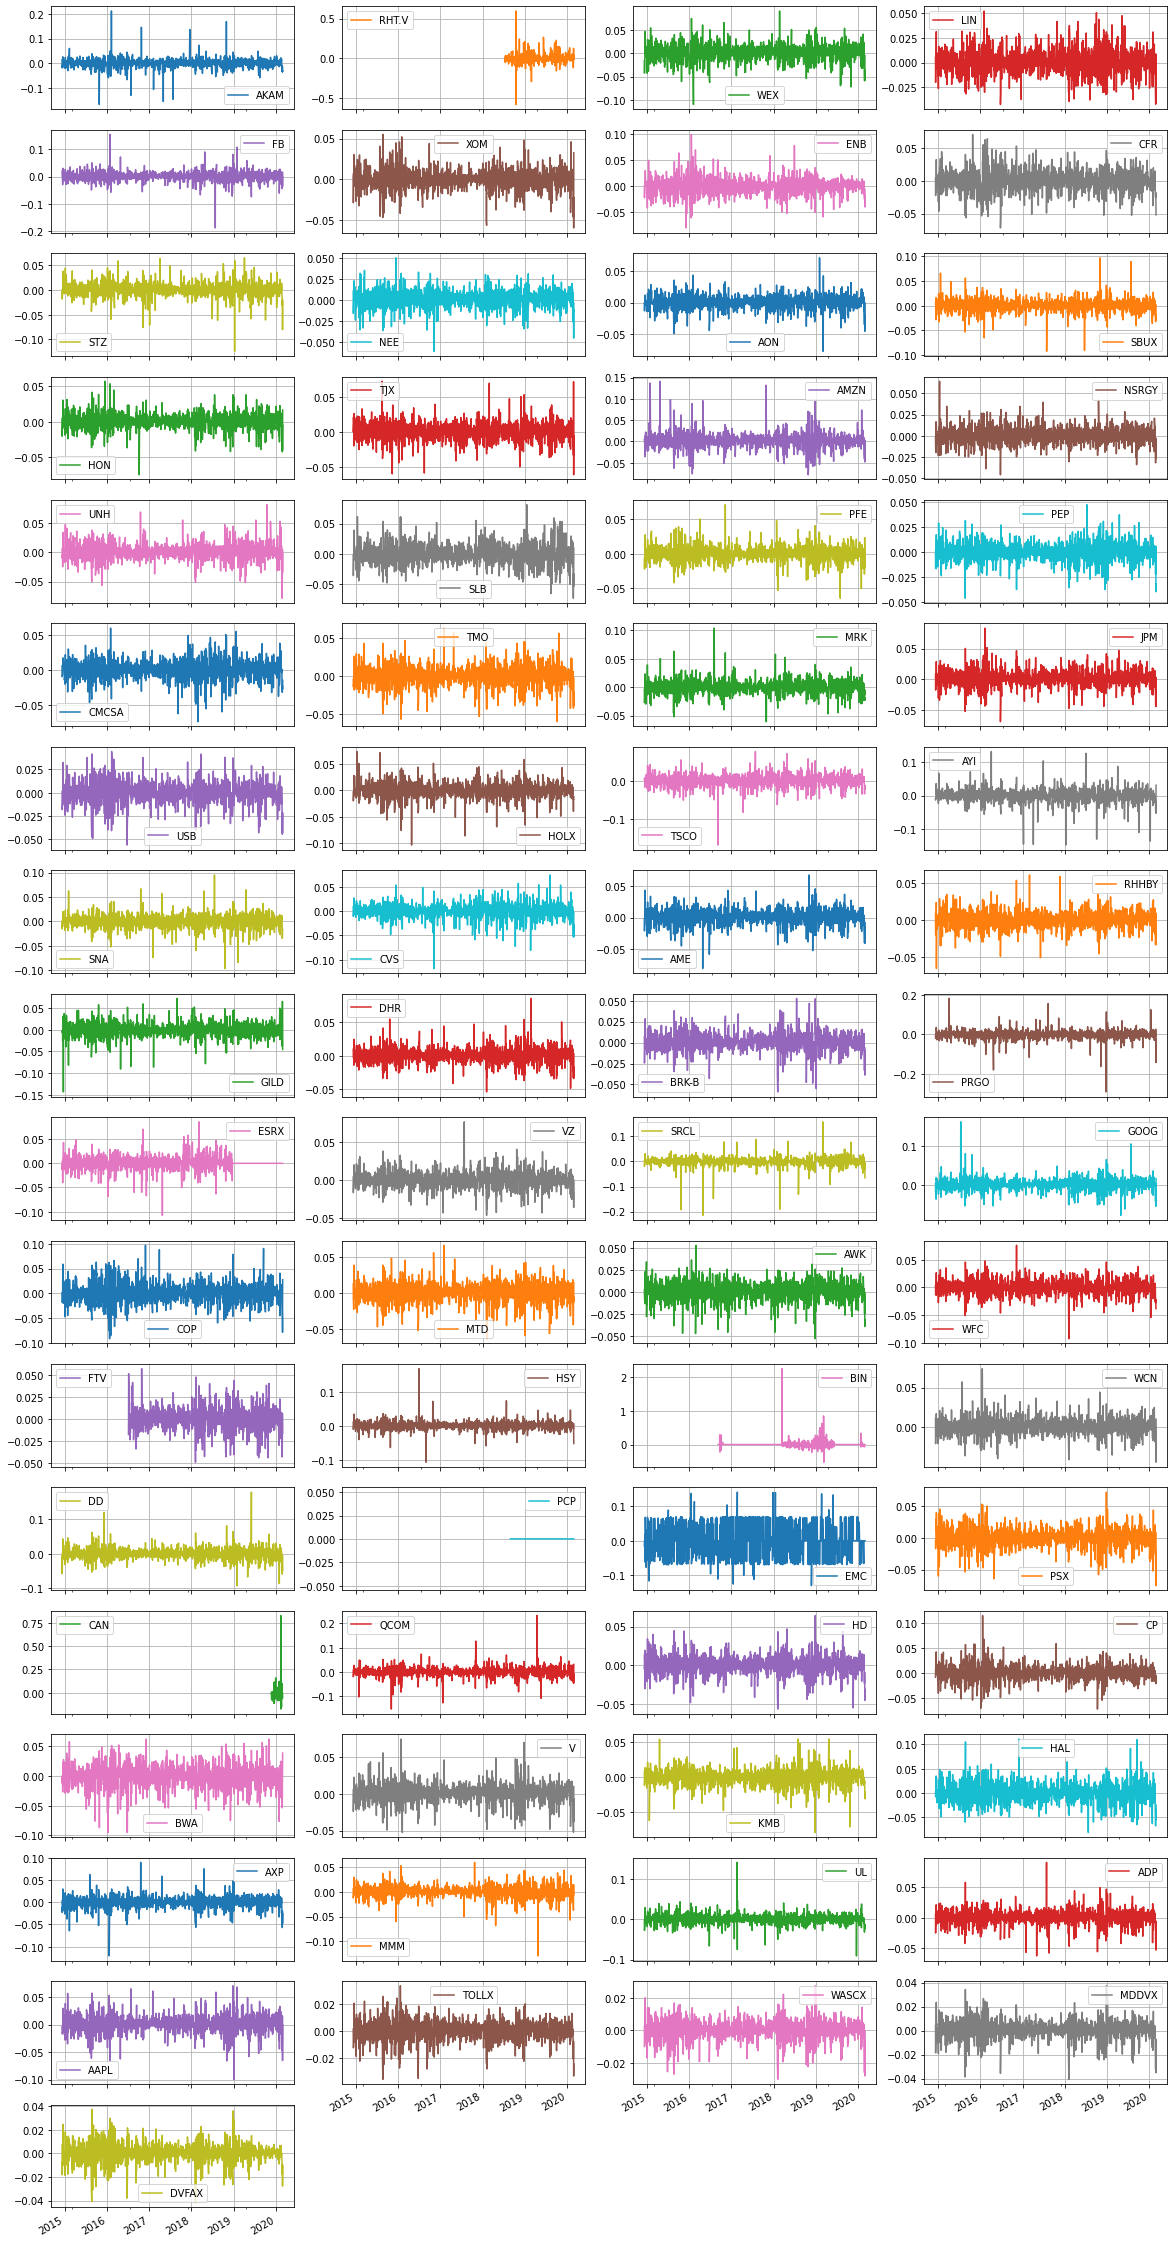

In [ ]:
return_data.plot(subplots=True,
        grid=True, 
        layout=(20,4),
         figsize=(20,50))
plt.show()

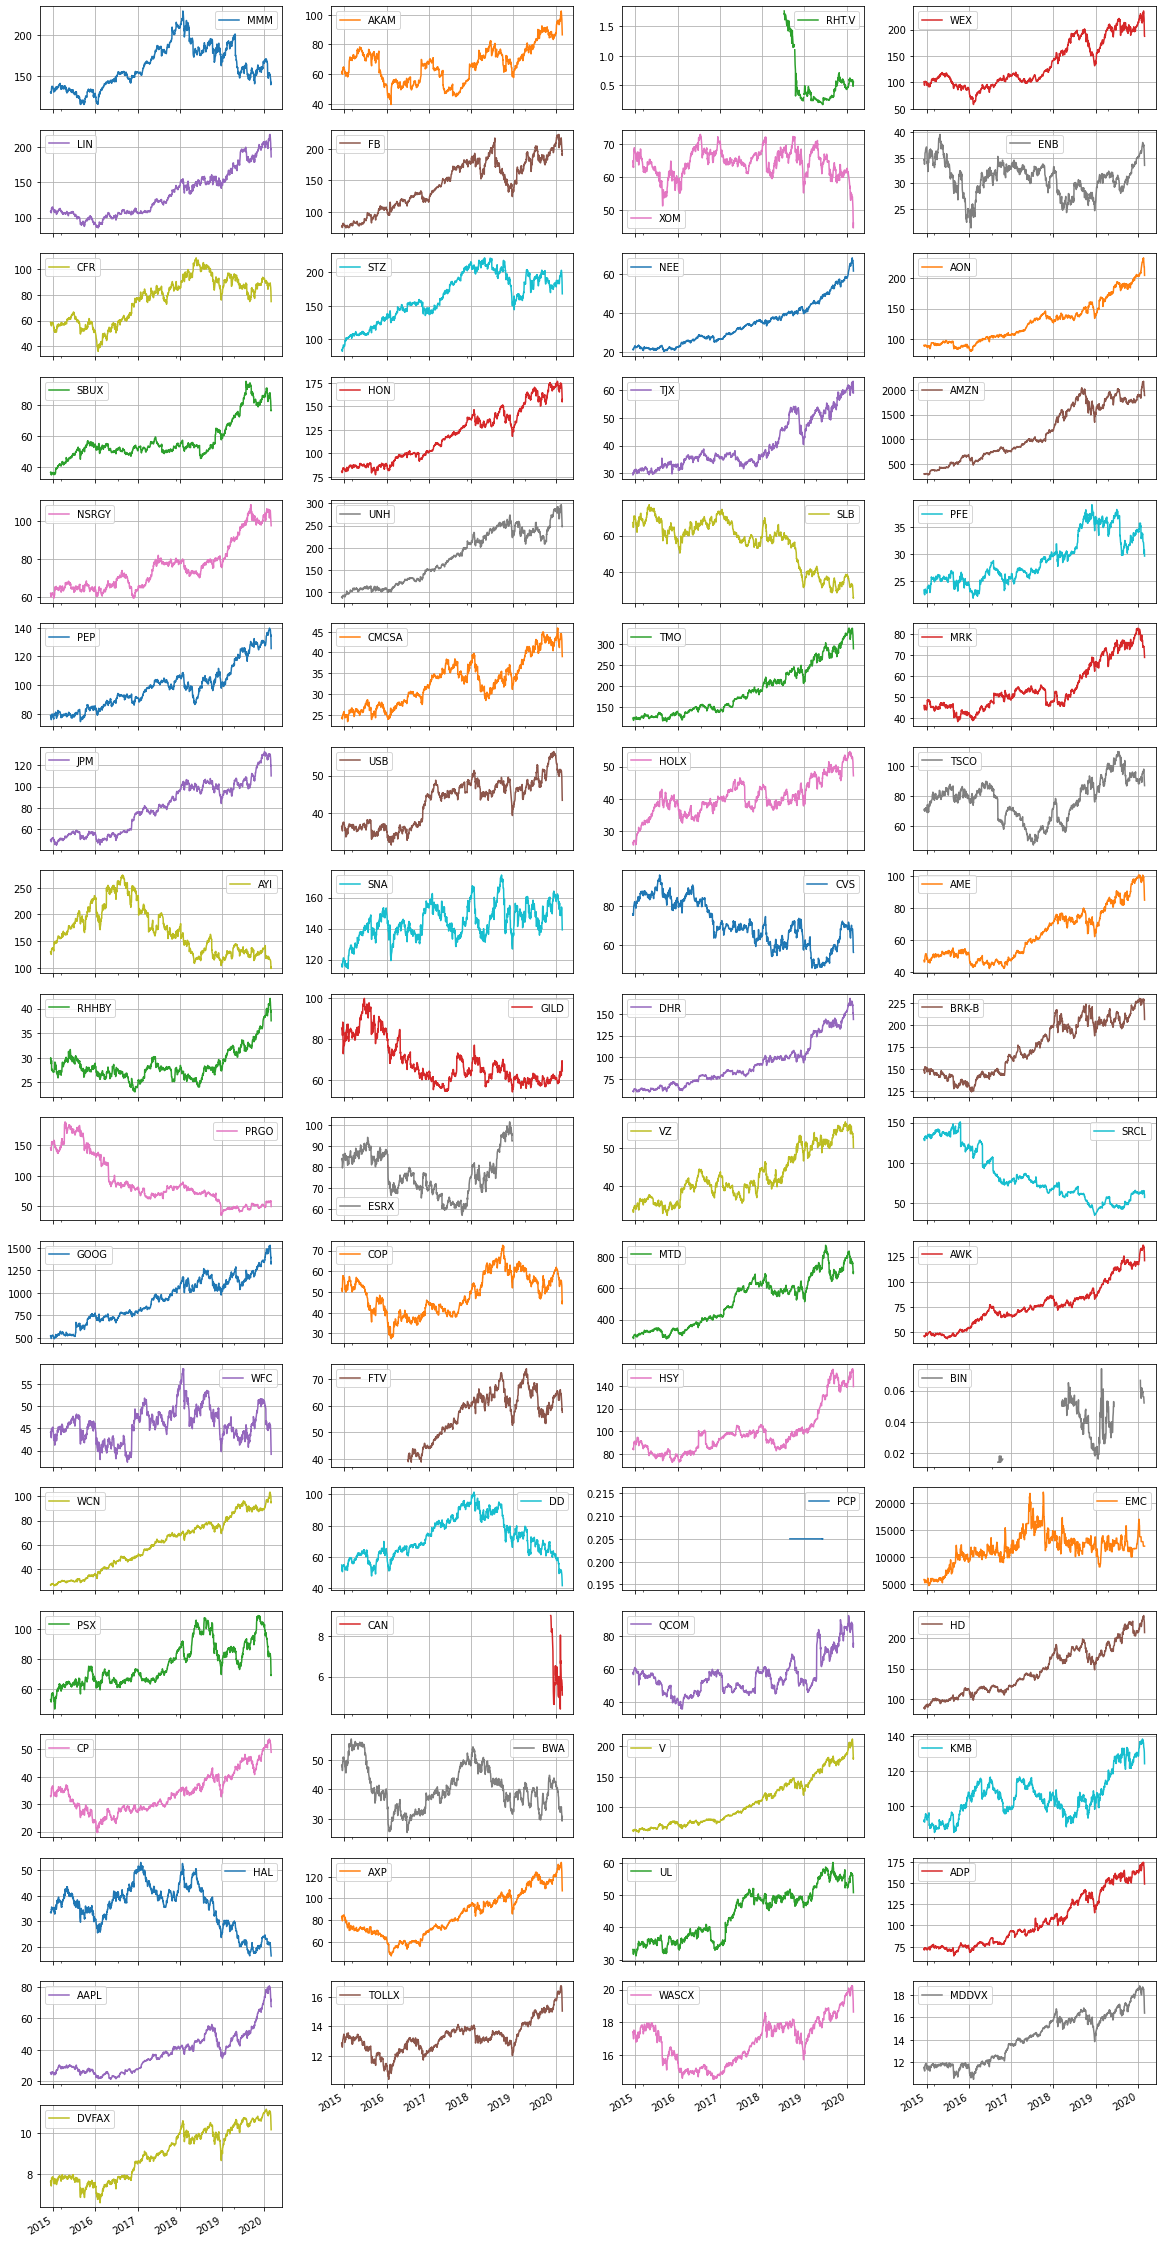

In [ ]:
# plot the stock historical price and data 
prep_data.plot(subplots=True,
        grid=True, 
        layout=(20,4),
        figsize=(20,50))
plt.show() # show the plots


In [ ]:
#Checking the average return and average standard deviation
Avg_Return = pd.DataFrame(np.mean(return_data) ,columns=["Avg_Return"])
print(Avg_Return)
Std_Dev_Return = pd.DataFrame(np.std(return_data) ,columns=["Std_Dev_Return"])
print(Std_Dev_Return)

       Avg_Return
AKAM     0.000468
RHT.V    0.000141
WEX      0.000624
LIN      0.000482
FB       0.000866
XOM     -0.000180
ENB      0.000102
CFR      0.000324
STZ      0.000626
NEE      0.000858
AON      0.000693
SBUX     0.000644
HON      0.000568
TJX      0.000616
AMZN     0.001554
NSRGY    0.000393
UNH      0.000880
SLB     -0.000575
PFE      0.000247
PEP      0.000396
CMCSA    0.000449
TMO      0.000733
MRK      0.000383
JPM      0.000689
USB      0.000198
HOLX     0.000548
TSCO     0.000295
AYI      0.000039
SNA      0.000228
CVS     -0.000109
AME      0.000522
RHHBY    0.000242
GILD    -0.000074
DHR      0.000721
BRK-B    0.000303
PRGO    -0.000538
ESRX     0.000164
VZ       0.000360
SRCL    -0.000436
GOOG     0.000829
COP      0.000103
MTD      0.000780
AWK      0.000794
WFC     -0.000001
FTV      0.000482
HSY      0.000463
BIN      0.004859
WCN      0.001006
DD      -0.000065
PCP      0.000000
EMC      0.001490
PSX      0.000324
CAN     -0.003140
QCOM     0.000403
HD       0

#### 2) Percent of total amount invested by each ticker

We performed group by with ticker and aggregated with amount_upper to get top 15 stocks that senator invested in. 

In [ ]:
total_amount = df_stock.amount_upper.sum()
df_groupby_ticker=df_stock.groupby(by=["ticker"]).aggregate({"actual_amount":"sum"})
df_groupby_ticker

# Change: groupby ticker and divide by sum of total amount invested
df_groupby_ticker_percent = df_groupby_ticker.apply(lambda x: 100 * (x / float(total_amount)))
df_groupby_ticker_percent.sort_values(by = 'actual_amount', ascending=False).iloc[:15,:] 

,actual_amount
ticker,
MMM,93.923171
WCN,0.122100
DHR,0.122100
MTD,0.122100
BRK-B,0.093923
V,0.093923
HSY,0.093923
JPM,0.093923
BIN,0.093923


#### 3) Top 10 tickers with highest amount invested

For analyzing the top tickers with highest amount invested by the senator we have created 3 plots - 



*   Table with all stocks and transactions grouped in Purchsed or Sale
*   Bar Plot visualizing the above table (without considering MMM stock). As we see from the below table that the senator purchsed MMM stock worth 50000000 amount which is way too high with respect to all the other tickers.
* Bar plot visualizing the total amount of investment using column actual_amount which is calculated by Purchased - Sale amount for each ticker. By this we get to know maount of investment left for each ticker. 


In [ ]:
# Figure size
plt.figure(figsize=(30,10))

# Creating series of tickers by group by ticker with total amount invested 
sum_amount_ticker = df_stock.groupby(['ticker','type_updated']).aggregate({"amount_upper":"sum"})
sum_amount_ticker

amount_upper
ticker type_updated              
AAPL   Purchase             15000
ADP    Sale                 15000
AKAM   Purchase             50000
AME    Purchase             50000
AMZN   Purchase             50000
AON    Purchase             15000
       Sale                 15000
AWK    Purchase             50000
AXP    Purchase             15000
       Sale                 75000
AYI    Purchase             50000
       Sale                 50000
BIN    Exchange             50000
BRK-B  Purchase             50000
BWA    Sale                 15000
CAN    Purchase             15000
CFR    Purchase             15000
       Sale                 15000
CMCSA  Sale                 15000
COP    Purchase             50000
       Sale                 15000
CP     Sale                 15000
CVET   Sale                 15000
CVS    Purchase             15000
       Sale                 50000
DD     Sale                 15000
DHR    Purchase             65000
DVFAX  Purchase             30000
EMC    Sale                 15000
ENB    Exchange             50000
       Sale                 50000
ESRX   Sale                 15000
FB     Purchase             15000
       Sale                 15000
FTV    Sale                 15000
GILD   Sale                 15000
GOOG   Sale                 15000
HAL    Sale                 60000
HD     Sale                 15000
HOLX   Purchase             50000
       Sale                 50000
HON    Sale                 50000
HSY    Purchase            100000
       Sale                 50000
JPM    Purchase             50000
KMB    Sale                 30000
LIN    Exchange             15000
       Purchase             15000
       Sale                 50000
MDDVX  Purchase             30000
MMM    Purchase          50000000
MRK    Purchase             15000
MTD    Purchase             65000
NEE    Purchase             50000
NSRGY  Purchase             15000
       Sale                 30000
PCP    Sale                 95000
PEP    Sale                 15000
PFE    Sale                 15000
PRGO   Purchase             50000
PSX    Purchase             15000
QCOM   Sale                 15000
RHHBY  Sale                 50000
RHT.V  Purchase            100000
       Sale                150000
SBUX   Sale                 50000
SLB    Sale                 15000
SNA    Sale                 50000
SRCL   Purchase             50000
       Sale                 50000
STZ    Purchase             50000
       Sale                 50000
TJX    Purchase             30000
TMO    Purchase             15000
TOLLX  Purchase             15000
       Sale                 15000
TSCO   Purchase             50000
       Sale                 50000
UL     Purchase             15000
UNH    Purchase             30000
USB    Purchase             65000
       Sale                 15000
V      Purchase             50000
VZ     Sale                 15000
WASCX  Purchase             15000
WCN    Exchange             50000
       Purchase             15000
WEX    Purchase             50000
WFC    Purchase             15000
       Sale                 50000
XOM    Sale                 15000

<Figure size 2160x720 with 0 Axes>

<Figure size 3600x2160 with 0 Axes>

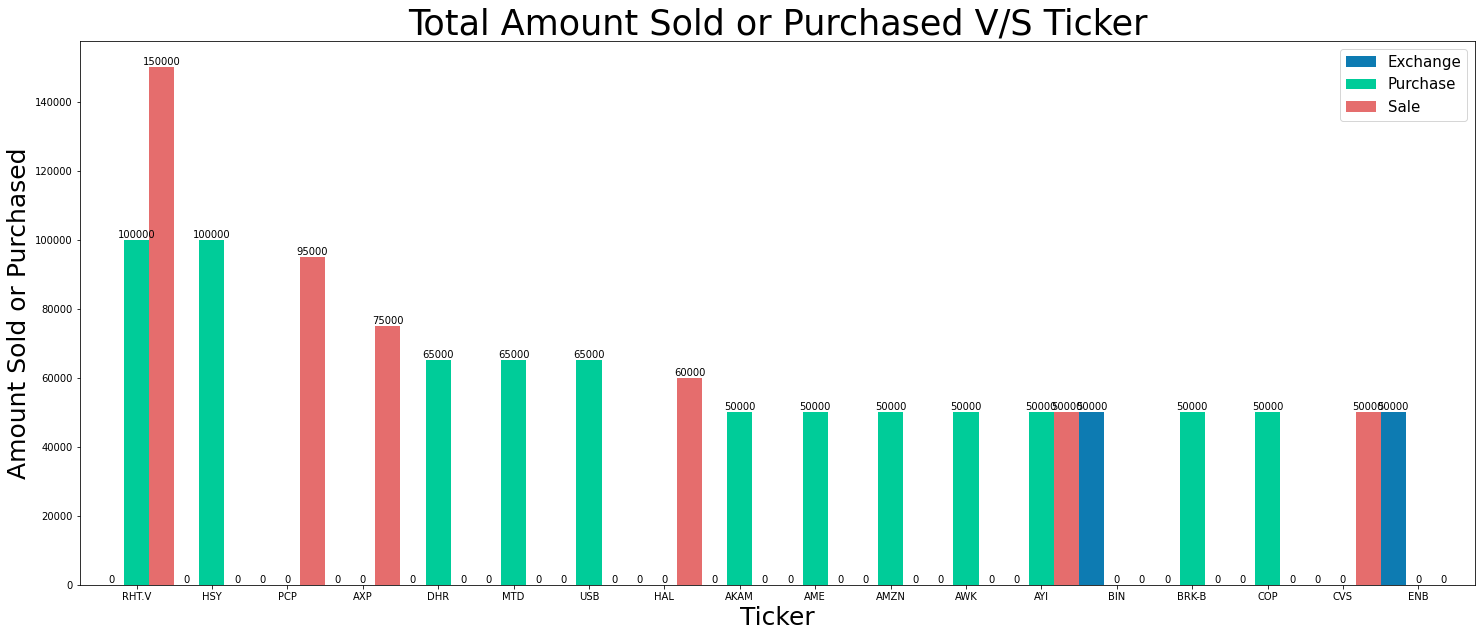

In [ ]:
# Ploting top tickers with highest amount invested

# Figure size
plt.figure(figsize=(50,30))

# Creating series of tickers by group by ticker with total amount invested 
df_stock_not_MMM = df_stock[(df_stock['ticker'] != 'MMM')]
ax = df_stock_not_MMM.groupby(['ticker','type_updated'])['amount_upper'].sum().nlargest(20).unstack('type_updated')
ax = ax.plot(kind = 'bar', 
             figsize=(25,10), 
             color = ["#0D7BB2", "#00CC99", '#E56D6D'],
             rot= 0,
             width=1)
ax.legend(loc=1, prop={'size': 15})

for container in ax.containers:
  ax.bar_label(container)

# # Show the plot
plt.xlabel('Ticker', fontsize=25)
plt.ylabel('Amount Sold or Purchased', fontsize=25)
plt.title('Total Amount Sold or Purchased V/S Ticker', fontsize=35)
plt.show()

**NOTE** : If you get any error here please restart runtime in import modules section and then run again. This is required because we have use some commands for which matplotlib version 3.4.3 was required. 

RHT.V is the highest sold ticker in respect to amount.  

MMM, RHT.V, HSY are the highest purchased tickers in respect to amount. 

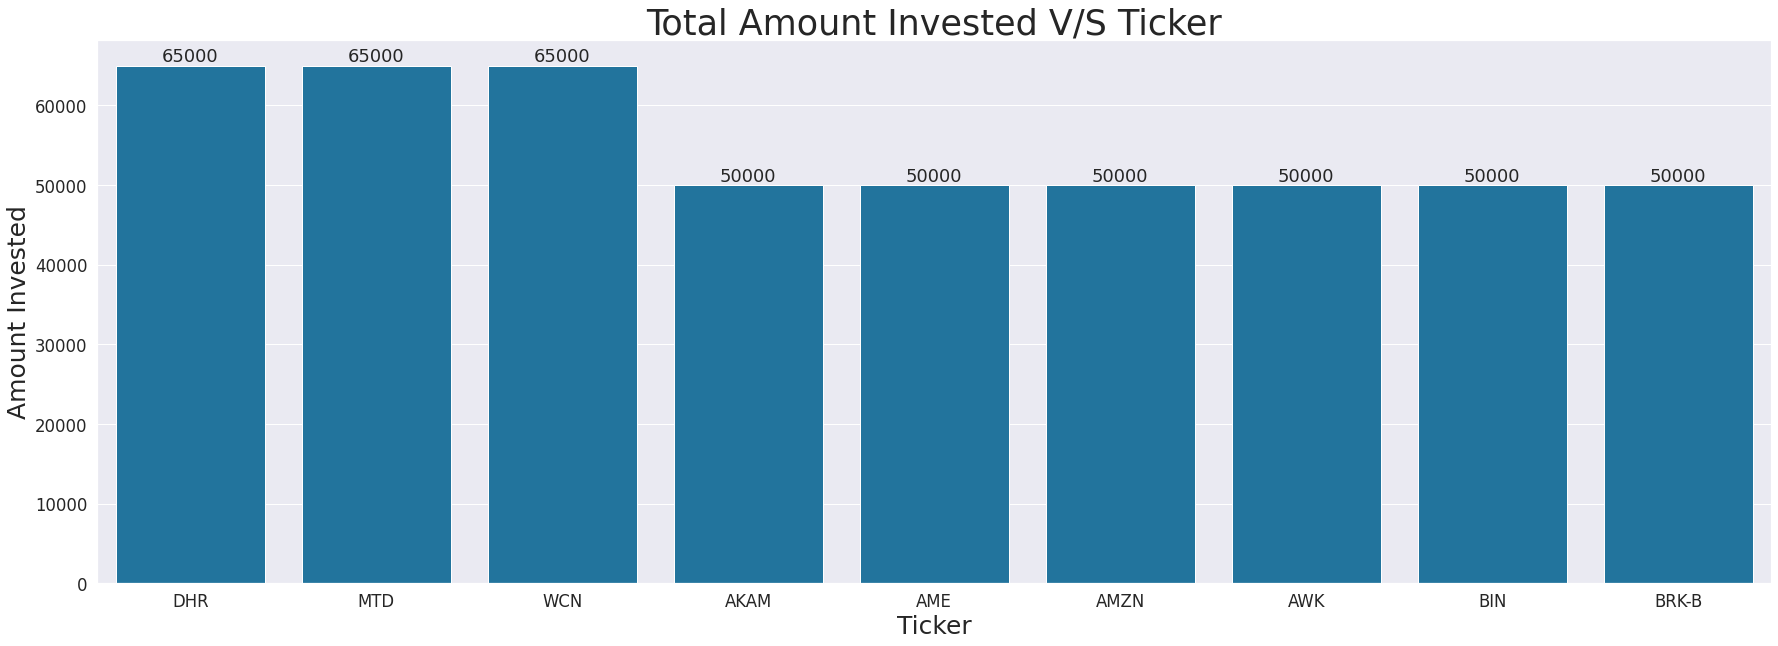

In [ ]:
# Ploting top 9 tickers apart from MMM with highest amount invested
df_stock_not_MMM = df_stock[(df_stock['ticker'] != 'MMM')]

# Figure size
plt.figure(figsize=(30,10))

# Creating series of tickers by group by ticker with total amount invested 
sum_amount_ticker_not_MMM = df_stock_not_MMM.groupby('ticker')['actual_amount'].sum().nlargest(9)

# Ticker v/s Amount invested barplot
sns.set(font_scale = 1.5)
ax = sns.barplot(x = sum_amount_ticker_not_MMM.index, 
            y = sum_amount_ticker_not_MMM,
            color = "#0D7BB2")
for container in ax.containers:
  ax.bar_label(container)

# Show the plot
plt.xlabel('Ticker', fontsize=25)
plt.ylabel('Amount Invested', fontsize=25)
plt.title('Total Amount Invested V/S Ticker', fontsize=35)
plt.show()

MMM, DHR, MTD, WCN are the stocks which still has highest amount left invested by the senator after all the purchase and selling of the stocks.

###### Highest purchased stocks

The highest purchased stock is MMM followed by HSY and RHT.V. 

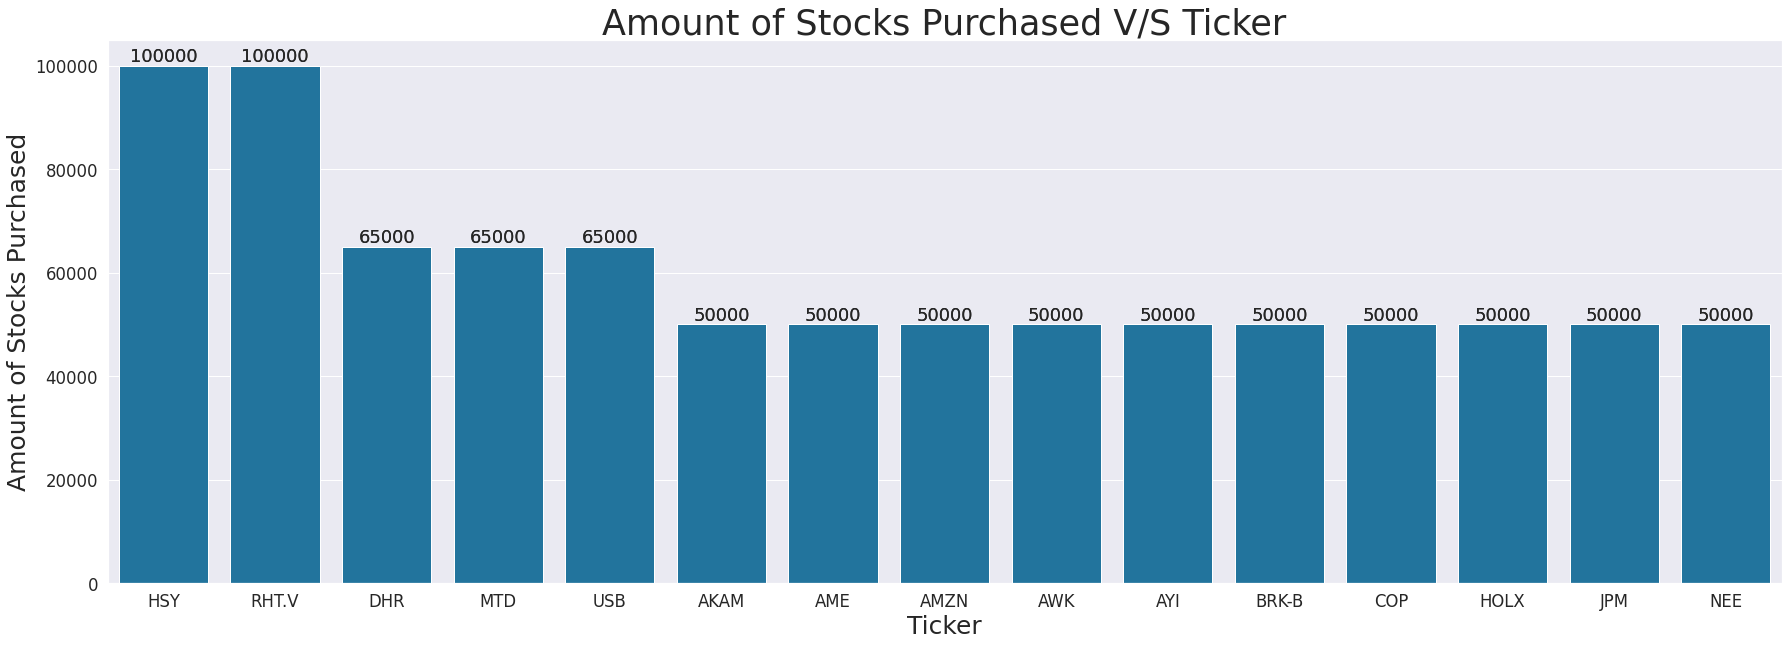

In [ ]:
# Ploting top 10 tickers with highest amount purchased

# Figure size
plt.figure(figsize=(30,10))

# Creating a dataframe where type of transaction is Purchase
df_stock_purchased = df_stock_not_MMM[(df_stock_not_MMM['type_updated'] == 'Purchase')]
# Creating series of tickers by group by ticker with total amount of transaction 
df_stock_purchased = df_stock_purchased.groupby('ticker')['amount_upper'].sum().nlargest(15)
sns.set(font_scale = 1.5)
ax = sns.barplot(x = df_stock_purchased.index, 
            y = df_stock_purchased,
            color = "#0D7BB2")
for container in ax.containers:
  ax.bar_label(container)

for container in ax.containers:
  ax.bar_label(container)

# # Show the plot
plt.xlabel('Ticker', fontsize=25)
plt.ylabel('Amount of Stocks Purchased', fontsize=25)
plt.title('Amount of Stocks Purchased V/S Ticker', fontsize=35)
plt.show()

###### Highest Sold Stocks

The highest sold stock is RHT.V followed by PCP and AXP. 

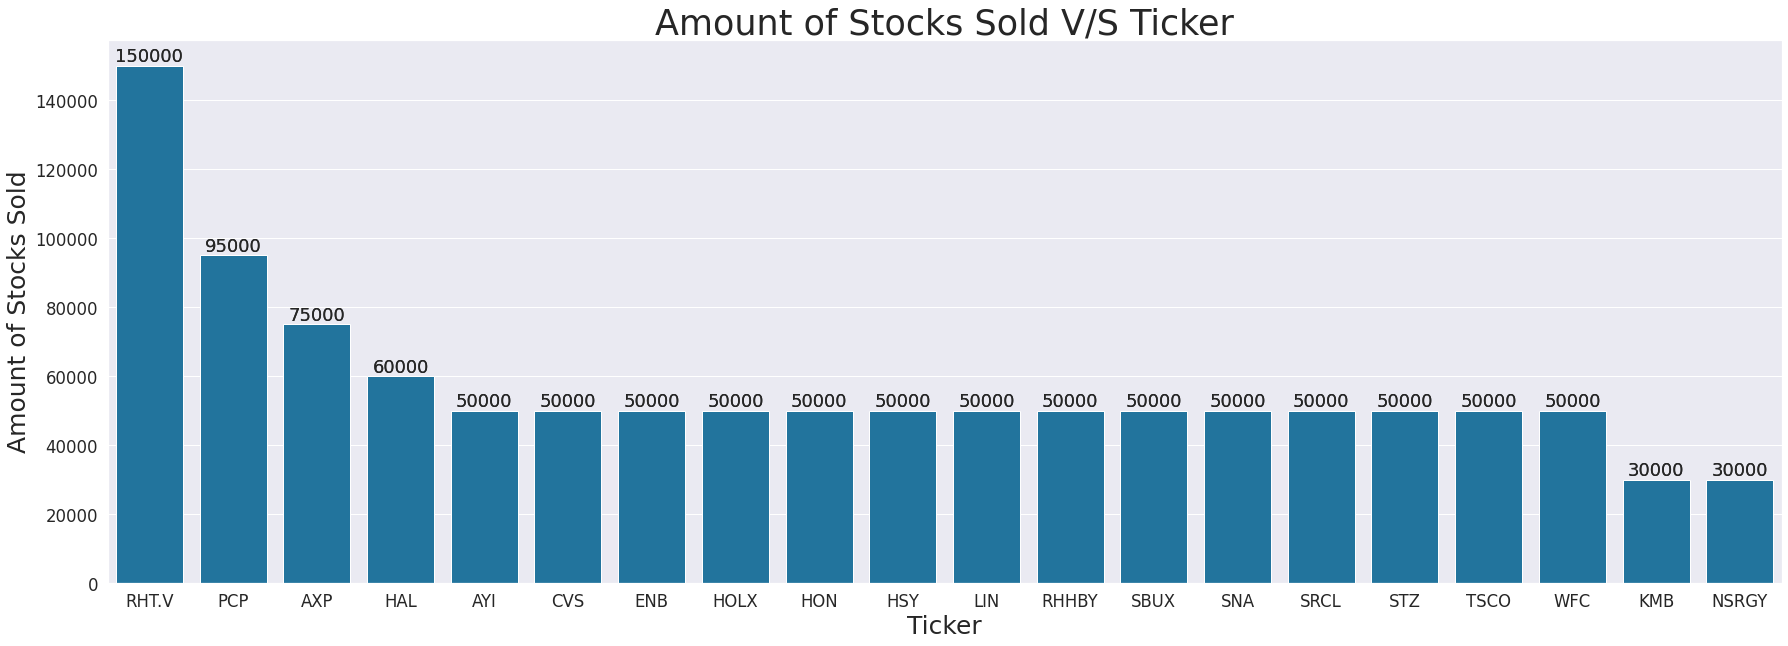

In [ ]:
# Ploting top 10 tickers with highest amount sold

# Figure size
plt.figure(figsize=(30,10))

# Creating a dataframe where type of transaction is Sale
df_stock_sold = df_stock[(df_stock['type_updated'] == 'Sale')]
# Creating series of tickers by group by ticker with total amount of transacation
df_stock_sold = df_stock_sold.groupby('ticker')['amount_upper'].sum().nlargest(20)
sns.set(font_scale = 1.5)
ax = sns.barplot(x = df_stock_sold.index, 
            y = df_stock_sold,
            color = "#0D7BB2")
for container in ax.containers:
  ax.bar_label(container)

for container in ax.containers:
  ax.bar_label(container)

# # Show the plot
plt.xlabel('Ticker', fontsize=25)
plt.ylabel('Amount of Stocks Sold', fontsize=25)
plt.title('Amount of Stocks Sold V/S Ticker', fontsize=35)
plt.show()

#### 4) Top 10 Industries with highest amount invested

To analyse what all industries the senator made most transactions we will use the actual_amount column by industries of the ticker. 

The actual_amount column represents the amount of stocks Purchased - Sold to get the total amount now invested in those industries. 

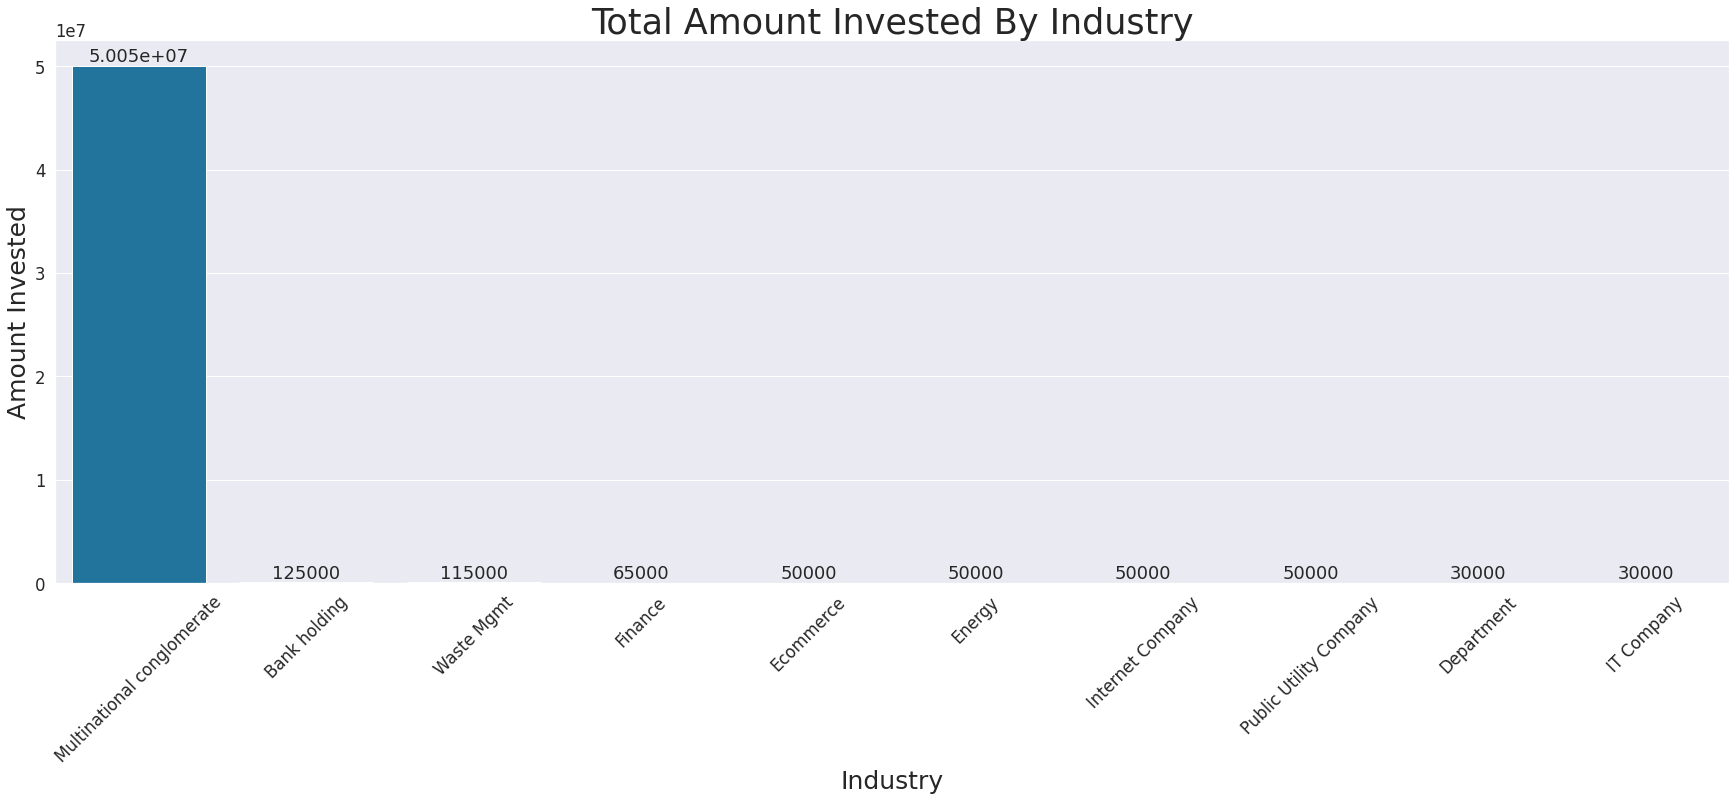

In [ ]:
# Ploting top 10 industries with highest amount invested

# Figure size
plt.figure(figsize=(30,10))

# Creating series of tickers by group by ticker with total amount invested 
sum_amount_industry = df_stock.groupby('Industry')['actual_amount'].sum().nlargest(10)

# Ticker v/s Amount invested barplot
sns.set(font_scale = 1.5)
ax = sns.barplot(x = sum_amount_industry.index, 
            y = sum_amount_industry,
            color = "#0D7BB2")
for container in ax.containers:
  ax.bar_label(container)
  
# Show the plot
plt.xlabel('Industry', fontsize=25)
plt.xticks(rotation = 45)
plt.ylabel('Amount Invested', fontsize=25)
plt.title('Total Amount Invested By Industry', fontsize=35)
plt.show()

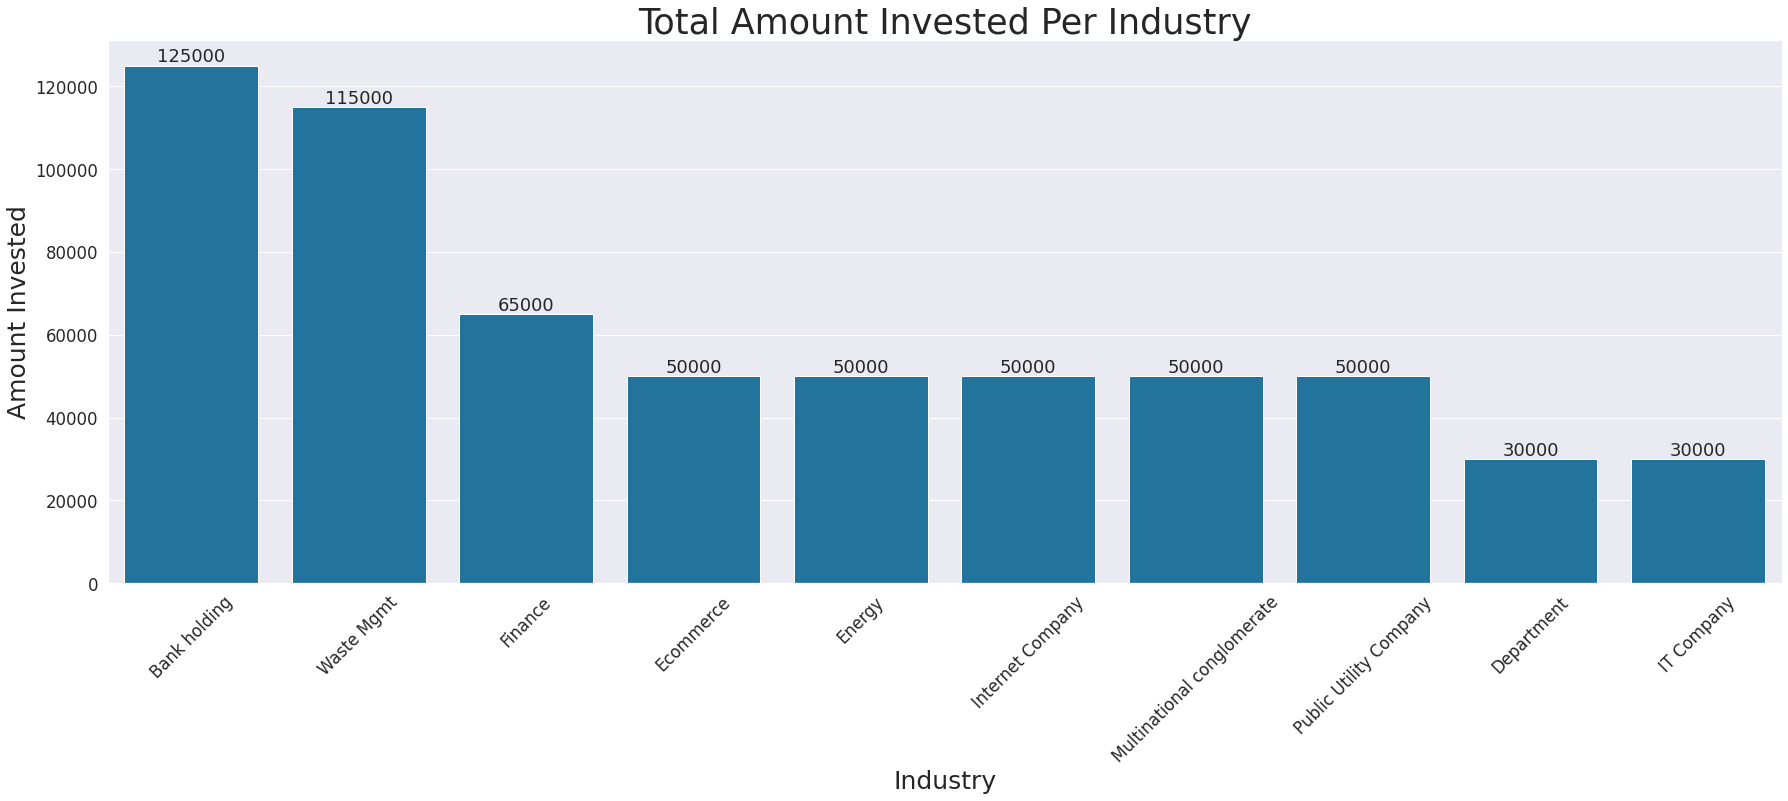

In [ ]:
# Ploting top 9 industries apart from MMM stock with highest amount invested

# Figure size
plt.figure(figsize=(30,10))

# Creating series of tickers by group by ticker with total amount invested 
sum_amount_ticker_not_MMM = df_stock_not_MMM.groupby('Industry')['actual_amount'].sum().nlargest(10)

# Ticker v/s Amount invested barplot
sns.set(font_scale = 1.5)
ax = sns.barplot(x = sum_amount_ticker_not_MMM.index, 
            y = sum_amount_ticker_not_MMM,
            color = "#0D7BB2")
for container in ax.containers:
  ax.bar_label(container)

# Show the plot
plt.xlabel('Industry', fontsize=25)
plt.xticks(rotation = 45)
plt.ylabel('Amount Invested', fontsize=25)
plt.title('Total Amount Invested Per Industry', fontsize=35)
plt.show()

Industries in which the senator has most invested in are Multinational conglomerate, Bank holding, IT company, Waste Management. 

Senator has listed numerous green stocks like WCN, AWK, and SRCL that are majorly handling the Wastes Management systems, wall street experts confirm there would be steep growth in their industries which senator has considered a safe stock.

#### 5) Monthly Stock Trading

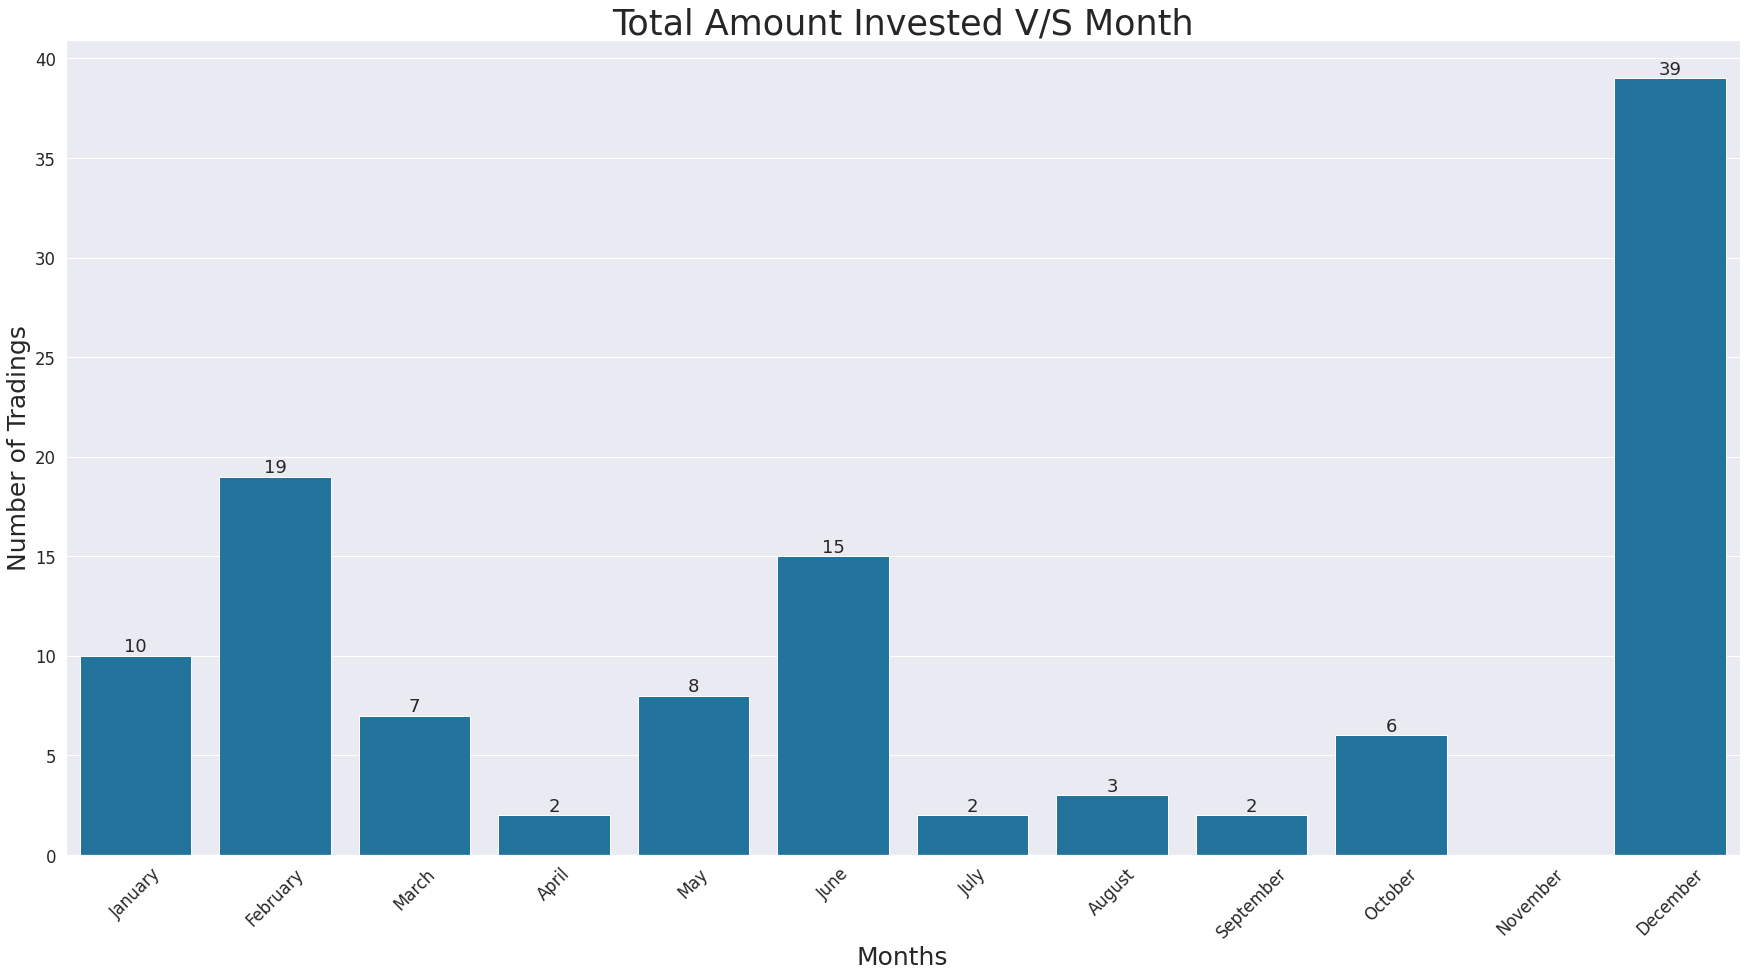

In [ ]:
# Figure size
plt.figure(figsize=(30,15))

# Creating series of tickers by group by Month with total amount invested 
sum_amount_Transaction_month = df_stock.groupby('tran_month')['amount_upper'].count()
#sum_amount_Transaction_month = df_stock['tran_Month'].value_counts()

# Ticker v/s Amount invested barplot
sns.set(font_scale = 1.5)
ax = sns.barplot(x = sum_amount_Transaction_month.index, 
            y = sum_amount_Transaction_month,
            color = "#0D7BB2",
            order = calendar.month_name[1:])
for container in ax.containers:
  ax.bar_label(container)

# Show the plot
plt.xlabel('Months', fontsize=25)
plt.xticks(rotation = 45)
plt.ylabel('Number of Tradings', fontsize=25)
plt.title('Total Amount Invested V/S Month', fontsize=35)
plt.show()

The senator made most trades in December following by February, June. Suprisingly she did not make any trades in November over the course of 6 years. 
She is not so active in trading in April and July - October. 

# Final 10 Stocks chosen for the modeling

**WCN**: As shown in the time series visualization WCN has got his 52 week high recently and maybe considered as one of most smartest choice from senetor as enviromentlist considers that WCN's new movements will take them all time high.

**BRK-B**: Based on the Will be considered as ine of the most stable stocks as history has shown the association with Warren Buffet's name will surely keep investment at low risk

**ADP**: ADP is a great dividend growth stock to buy and hold for the long term

**UNH**: Most profitable in the last quater reason being China's volitility doesn't affect the stocks.

**GOOG**: GOOG are Class C shares and the global cloud computing market is growing ,according to Research and Markets, so Google's cloud business could continue to grow faster than its core advertising business for the foreseeable future.

**AMZN**:Amazon stock is not a good buy. Among other things, the stock is trading below its 50-day moving average, a negative sign.

**AWK**: Stable stock as it shows upwards steady growth in the invertment and low risk shows it is good choice from senator

**TSCO**: TSCO shares are showing upward trend as they have shown strength in pet products and as indicated there might be solid earnings as per previous term revisions.

**HOLX**: Valuation metrics show that Hologic, Inc. may be undervalued, The financial health and growth prospects of HOLX, demonstrate its potential to outperform the market.

**HSY**: The hersheys company has hedge fund interest which is above average and hence has 5 star hold rating in wall street which makes it a potential profitable stocks.